In [1]:
# Setting up the directory
import os
os.getcwd()
os.chdir('F:\GreatLake_DataAnalytics\Python\Project\MovieReview\Data')
os.getcwd()

'F:\\GreatLake_DataAnalytics\\Python\\Project\\MovieReview\\Data'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anandha_S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#Read the data
pd.set_option("display.max_columns", None)
MovieLines = pd.read_csv('movie_lines.tsv',sep='\t',
                       names=['LineID','CharacterID','MovieID','Charactername','MovieDialogue'])
MovieTitle = pd.read_csv('movie_titles_metadata.tsv',sep='\t',
                       names=['MovieID','Movietitle','Movieyear','IMDBrating','IMDBvotes','Genresformat'])
MovieCharacter = pd.read_csv('movie_characters_metadata.tsv',sep='\t',
                       names=['CharacterID','Charactername','MovieID','Movietitle','Gender','Positioncredits'])


# Basic checks of the file

In [6]:
MovieLines.head()

,LineID,CharacterID,MovieID,Charactername,MovieDialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [7]:
MovieTitle.head()

,MovieID,Movietitle,Movieyear,IMDBrating,IMDBvotes,Genresformat
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [8]:
MovieCharacter.head()

,CharacterID,Charactername,MovieID,Movietitle,Gender,Positioncredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [9]:
MovieLines.shape # Helps us to understand the total observations and variables
MovieLines.info() # helps us to understand the total observations, variables and its types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304664 entries, 0 to 304663
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   LineID         304664 non-null  object
 1   CharacterID    304664 non-null  object
 2   MovieID        304664 non-null  object
 3   Charactername  304621 non-null  object
 4   MovieDialogue  304401 non-null  object
dtypes: object(5)
memory usage: 11.6+ MB


In [10]:
MovieTitle.shape
MovieTitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       617 non-null    object 
 1   Movietitle    616 non-null    object 
 2   Movieyear     616 non-null    object 
 3   IMDBrating    616 non-null    float64
 4   IMDBvotes     616 non-null    float64
 5   Genresformat  616 non-null    object 
dtypes: float64(2), object(4)
memory usage: 29.0+ KB


In [11]:
MovieCharacter.shape
MovieCharacter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9035 entries, 0 to 9034
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CharacterID      9035 non-null   object
 1   Charactername    9016 non-null   object
 2   MovieID          9017 non-null   object
 3   Movietitle       9017 non-null   object
 4   Gender           9017 non-null   object
 5   Positioncredits  9017 non-null   object
dtypes: object(6)
memory usage: 423.6+ KB


# Missing Value identification and treatement

In [12]:
percent_missing_t = round((MovieLines.isnull().sum()) * 100 /len(MovieLines),3)
missing_value_df_t = pd.DataFrame({'Number of missing values':MovieLines.isnull().sum(),
                                 'Percentage of missing values': percent_missing_t})
missing_value_df_t.transpose()

,LineID,CharacterID,MovieID,Charactername,MovieDialogue
Number of missing values,0.0,0.0,0.0,43.000,263.000
Percentage of missing values,0.0,0.0,0.0,0.014,0.086


In [13]:
MovieLines=MovieLines.dropna() # Drops the row which has missing values.
percent_missing_t = round((MovieLines.isnull().sum()) * 100 /len(MovieLines),3)
missing_value_df_t = pd.DataFrame({'Number of missing values':MovieLines.isnull().sum(),
                                 'Percentage of missing values': percent_missing_t})
missing_value_df_t.transpose()

,LineID,CharacterID,MovieID,Charactername,MovieDialogue
Number of missing values,0.0,0.0,0.0,0.0,0.0
Percentage of missing values,0.0,0.0,0.0,0.0,0.0


In [14]:
percent_missing_t = round((MovieTitle.isnull().sum()) * 100 /len(MovieTitle),3)
missing_value_df_t = pd.DataFrame({'Number of missing values': MovieTitle.isnull().sum(),
                                 'Percentage of missing values': percent_missing_t})
missing_value_df_t.transpose()

,MovieID,Movietitle,Movieyear,IMDBrating,IMDBvotes,Genresformat
Number of missing values,0.0,1.000,1.000,1.000,1.000,1.000
Percentage of missing values,0.0,0.162,0.162,0.162,0.162,0.162


In [15]:
MovieTitle=MovieTitle.dropna() # Drops the row which has missing values.
percent_missing_t = round((MovieTitle.isnull().sum()) * 100 /len(MovieTitle),3)
missing_value_df_t = pd.DataFrame({'Number of missing values': MovieTitle.isnull().sum(),
                                 'Percentage of missing values': percent_missing_t})
missing_value_df_t.transpose()

,MovieID,Movietitle,Movieyear,IMDBrating,IMDBvotes,Genresformat
Number of missing values,0.0,0.0,0.0,0.0,0.0,0.0
Percentage of missing values,0.0,0.0,0.0,0.0,0.0,0.0


# Treatement of special character in "Movie character" & "Positioncredits"

In [16]:
MovieCharacter.Gender.value_counts() # helps to understand how the Gender column is distributed.

?    6008
m    1899
f     921
M     145
F      44
Name: Gender, dtype: int64

In [17]:
MovieCharacter = MovieCharacter[MovieCharacter.Gender != '?'] # drops the row which has "?" 
                                                            #and retains rows which do not have "?"
MovieCharacter.Gender = MovieCharacter.Gender.apply(lambda g: 0 if g in ['f', 'F'] else 1)  ## Label encoding
MovieCharacter.Gender.value_counts()

1    2062
0     965
Name: Gender, dtype: int64

In [18]:
MovieCharacter = MovieCharacter[MovieCharacter.Positioncredits != '?']
MovieCharacter.Positioncredits = MovieCharacter.Positioncredits.apply(lambda p: '3+' if not p in ['1', '2'] else p) 
## Label encoding
MovieCharacter.Positioncredits.value_counts()

3+    1757
1      497
2      443
Name: Positioncredits, dtype: int64

# Exploratory Data Analysis

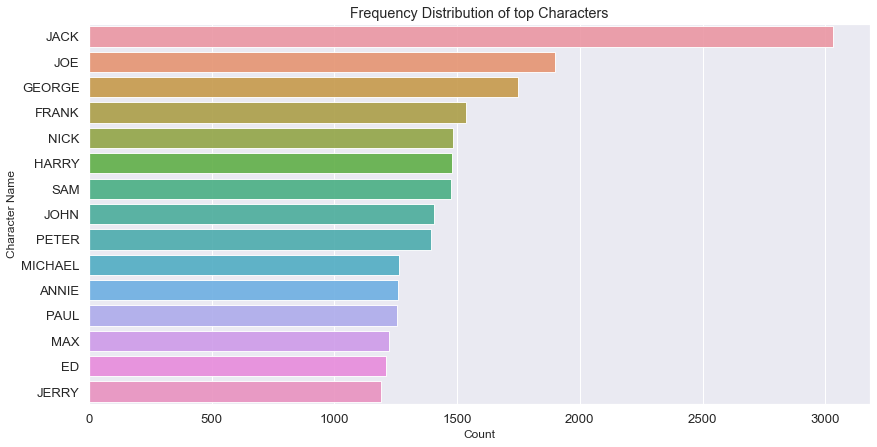

In [19]:
Chars=nltk.FreqDist(MovieLines['Charactername']) # calaculates number of times the characters appears in the movie 
Chars_df = pd.DataFrame({'Character': list(Chars.keys()), 
                              'Count': list(Chars.values())}) # created a dataframe, to display character name and its counts
TopChar = Chars_df.nlargest(columns="Count", n = 15) # identifying top 15 characters
sns.set(style="darkgrid",font_scale=1.2) # sets the color palates
plt.figure(figsize=(14, 7)) # sets width and height to display the graphs
sns.barplot(data=TopChar, x= "Count", y = "Character", alpha=0.9)
plt.title('Frequency Distribution of top Characters')
plt.ylabel('Character Name', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

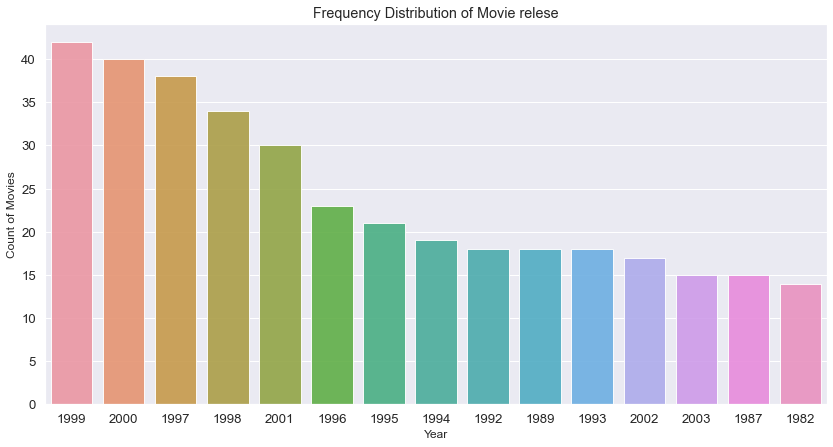

In [20]:
NMovies=nltk.FreqDist(MovieTitle['Movieyear']) # calaculates number of times the movie appears in the year 
NMovies_df = pd.DataFrame({'Year': list(NMovies.keys()), 
                              'Count': list(NMovies.values())}) # created a dataframe, to display year and its counts
TopYear = NMovies_df.nlargest(columns="Count", n = 15) # identifying top 15 characters
TopYear = TopYear.sort_values('Count',ascending=False).reset_index()
sns.set(style="darkgrid",font_scale=1.2) # sets the color palates
plt.figure(figsize=(14, 7)) # sets width and height to display the graphs
sns.barplot(data=TopYear, x= "Year", y = "Count", alpha=0.9,order=TopYear['Year'])
plt.title('Frequency Distribution of Movie relese')
plt.ylabel('Count of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

In [21]:
MovieTitle.nlargest(columns="IMDBrating", n = 10) # picks the highest rated movie and displays in the sorted order

,MovieID,Movietitle,Movieyear,IMDBrating,IMDBvotes,Genresformat
457,m457,neuromancer,1988,9.3,48.0,['action' 'adventure' 'animation' 'sci-fi']
203,m203,the godfather,1972,9.2,419312.0,['crime' 'drama' 'thriller']
369,m369,the godfather: part ii,1974,9.0,251290.0,['crime' 'drama' 'thriller']
463,m463,one flew over the cuckoo's nest,1975,8.9,219739.0,['drama']
504,m504,schindler's list,1993,8.9,282473.0,['biography' 'drama' 'history' 'war']
42,m42,casablanca,1942,8.8,170874.0,['drama' 'romance' 'war']
348,m348,fight club,1999,8.8,391697.0,['crime' 'drama' 'mystery' 'thriller']
372,m372,goodfellas,1990,8.8,234582.0,['crime' 'drama' 'thriller']
529,m529,star wars,1977,8.8,326619.0,['action' 'adventure' 'fantasy' 'sci-fi']
167,m167,rear window,1954,8.7,121165.0,['crime' 'mystery' 'romance' 'thriller']


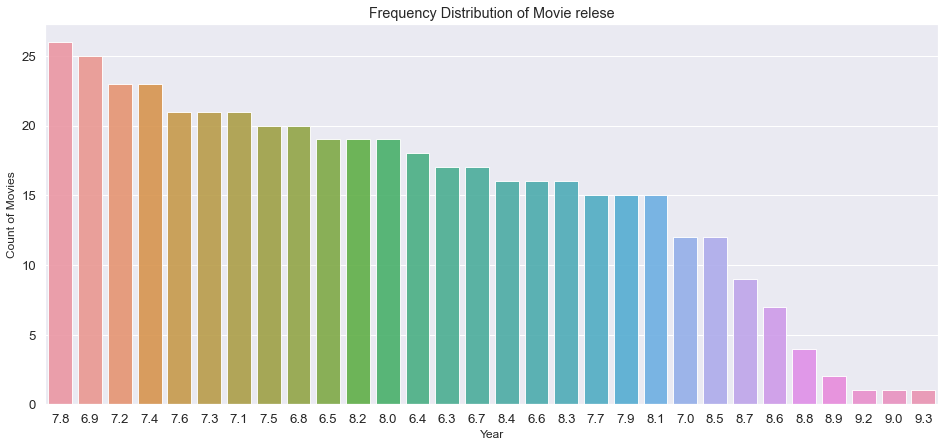

In [22]:
MovieRt=nltk.FreqDist(MovieTitle['IMDBrating']) # calaculates number of times particular rating appears
MovieRt_df = pd.DataFrame({'Rating': list(MovieRt.keys()), 
                              'Count': list(MovieRt.values())}) # created a dataframe, to display year and its counts
TopRate = MovieRt_df.nlargest(columns="Rating", n = 30) # identifying top 15 characters
TopRate = TopRate.sort_values('Count',ascending=False).reset_index()
sns.set(style="darkgrid",font_scale=1.2) # sets the color palates
plt.figure(figsize=(16, 7)) # sets width and height to display the graphs
sns.barplot(data=TopRate, x= "Rating", y = "Count", alpha=0.9,order=TopRate['Rating'])
plt.title('Frequency Distribution of Movie relese')
plt.ylabel('Count of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

In [23]:
round(MovieTitle.describe().transpose(),2) # helps to understand more about numberical variables - mean, SD, Min. and Max values

,count,mean,std,min,25%,50%,75%,max
IMDBrating,616.0,6.87,1.22,2.5,6.2,7.0,7.8,9.3
IMDBvotes,616.0,49901.70,61898.37,9.0,9992.5,27121.5,66890.0,419312.0


In [24]:
MovieLines.describe().transpose()

,count,unique,top,freq
LineID,304358,304358,L1045,1
CharacterID,304358,9031,u4525,537
MovieID,304358,617,m289,1530
Charactername,304358,5353,JACK,3032
MovieDialogue,304358,265579,What?,1680


# Prepare Analysis Base table

In [25]:
MoviePred = pd.merge(MovieLines, MovieCharacter, how='inner', on=['CharacterID','MovieID', 'Charactername'],sort=True)
# WE use the function merge with "inner" join concept to pull all records which are common 
#on both files based on the indicated columns

In [26]:
MovieTitlePart = MovieTitle[['MovieID','Movieyear']]
MovieTitlePart['Movieyear'] = pd.to_numeric(MovieTitlePart['Movieyear'], errors='coerce')
MovieTitlePart.isnull().sum() # Check for null value before merging

MovieID       0
Movieyear    16
dtype: int64

In [27]:
MovieTitlePart = MovieTitlePart.dropna() # drop the null value data
MovieTitlePart.isnull().sum()

MovieID      0
Movieyear    0
dtype: int64

In [28]:
MoviePredF = pd.merge(MoviePred, MovieTitlePart, how='inner', on=['MovieID'],sort=True)

In [29]:
MoviePredF.head() # to check if the data was imported correctly

,LineID,CharacterID,MovieID,Charactername,MovieDialogue,Movietitle,Gender,Positioncredits,Movieyear
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,0,3+,1999.0
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,0,3+,1999.0
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,0,3+,1999.0
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,0,3+,1999.0
4,L870,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,10 things i hate about you,0,3+,1999.0


In [30]:
MoviePred.shape # to check the no. of records and variables/features

(215758, 8)

In [31]:
MoviePredF.isnull().sum() # Again to check and ensure is there any Null value in the table. 

LineID             0
CharacterID        0
MovieID            0
Charactername      0
MovieDialogue      0
Movietitle         0
Gender             0
Positioncredits    0
Movieyear          0
dtype: int64

# Feature Engineering

In [32]:
MoviePredF['DialogueLength'] = MoviePredF.MovieDialogue.str.len()  # Length of the dialogue by each character
MoviePredF['WordsinDialogue'] = MoviePredF.MovieDialogue.str.count(' ') + 1 # No of words in the dialogue
MoviePredF.head()

,LineID,CharacterID,MovieID,Charactername,MovieDialogue,Movietitle,Gender,Positioncredits,Movieyear,DialogueLength,WordsinDialogue
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,0,3+,1999.0,12,3
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,0,3+,1999.0,10,3
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,0,3+,1999.0,9,2
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,0,3+,1999.0,46,10
4,L870,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,10 things i hate about you,0,3+,1999.0,104,20


In [33]:
import string
def Punctuation_Count(MovieDialogue):
    PunctCount = sum([1 for c in MovieDialogue if c in string.punctuation])
    return (PunctCount)
MoviePredF['Punctuation_Count'] = MoviePredF['MovieDialogue'].apply(Punctuation_Count)
MoviePredF.head()

,LineID,CharacterID,MovieID,Charactername,MovieDialogue,Movietitle,Gender,Positioncredits,Movieyear,DialogueLength,WordsinDialogue,Punctuation_Count
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,0,3+,1999.0,12,3,1
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,0,3+,1999.0,10,3,1
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,0,3+,1999.0,9,2,2
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,0,3+,1999.0,46,10,4
4,L870,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,10 things i hate about you,0,3+,1999.0,104,20,10


# Clean the column Dialogue

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lematizer=WordNetLemmatizer()
def clean_MovieDialogue(MovieDialogue):
    CleanText = re.sub("[^a-zA-Z]", " ",MovieDialogue) # cleans the other than characters
    CleanText = CleanText.lower().split()  # converts to lowercase and splits by each word                            
    CleanText = [lematizer.lemmatize(word) for word in CleanText if not word in stopwords.words('english')]
            # Removes the stopwords like in, and, they, etc. and then finds the meaningful root word Eg. stoped. The 
        # root words is stop.
    return( " ".join(CleanText)) # returs the cleaned text to the function
MoviePredF['Clean_MovieDialogue'] = MoviePredF['MovieDialogue'].apply(clean_MovieDialogue) # replaces the dialogue text and
# stores the cleaned text in the new column

In [35]:
MoviePredF.head()

,LineID,CharacterID,MovieID,Charactername,MovieDialogue,Movietitle,Gender,Positioncredits,Movieyear,DialogueLength,WordsinDialogue,Punctuation_Count,Clean_MovieDialogue
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,0,3+,1999.0,12,3,1,
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,0,3+,1999.0,10,3,1,hope
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,0,3+,1999.0,9,2,2,let go
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,0,3+,1999.0,46,10,4,okay gonna need learn lie
4,L870,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,10 things i hate about you,0,3+,1999.0,104,20,10,kidding know sometimes become persona know quit


In [36]:
MoviePredF.drop(['LineID','Movietitle'],axis = 1,inplace=True) # drops the column

In [37]:
MoviePredF.head()

,CharacterID,MovieID,Charactername,MovieDialogue,Gender,Positioncredits,Movieyear,DialogueLength,WordsinDialogue,Punctuation_Count,Clean_MovieDialogue
0,u0,m0,BIANCA,They do not!,0,3+,1999.0,12,3,1,
1,u0,m0,BIANCA,I hope so.,0,3+,1999.0,10,3,1,hope
2,u0,m0,BIANCA,Let's go.,0,3+,1999.0,9,2,2,let go
3,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,0,3+,1999.0,46,10,4,okay gonna need learn lie
4,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,0,3+,1999.0,104,20,10,kidding know sometimes become persona know quit


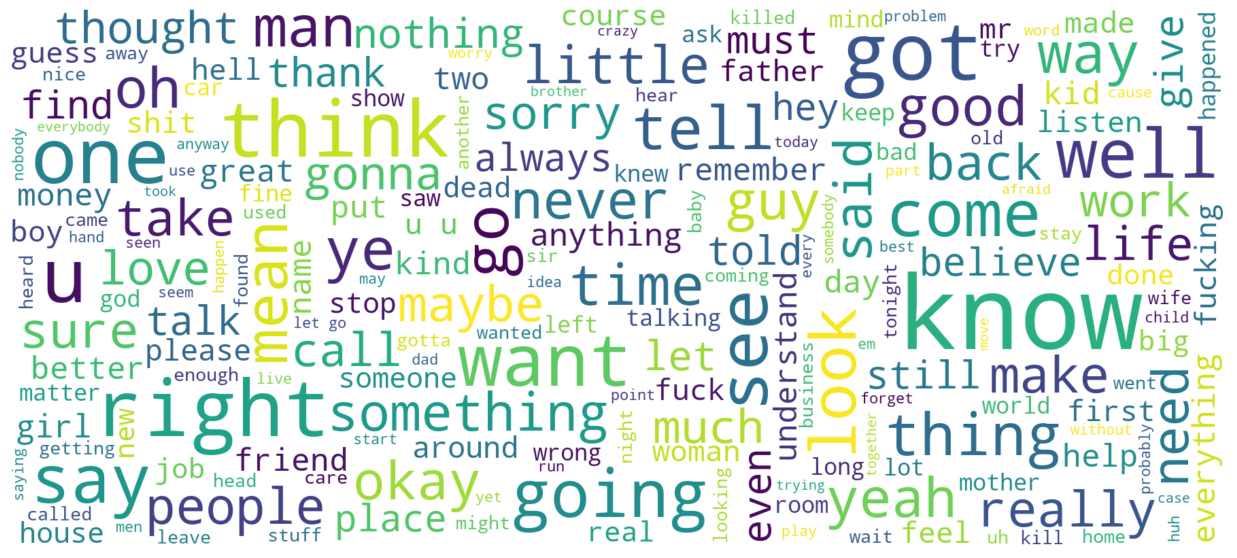

In [158]:
#!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
#text = MoviePredF.Clean_MovieDialogue[7]
#rose_mask = np.array(Image.open("apple.jpg"))
text = " ".join(Clean_MovieDialogue for Clean_MovieDialogue in MoviePredF.Clean_MovieDialogue)
wordcloud = WordCloud(width=1800, height = 800, margin=8, max_font_size=150,
                      background_color="white",mode='RGB',contour_width=5, contour_color='green').generate(text)

plt.figure(figsize=(25,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [38]:
MoviePredFinal = MoviePredF.groupby(['CharacterID', 'MovieID', 'Charactername', 'Gender', 'Positioncredits','Movieyear']). \
            agg({'DialogueLength' : ['median'], 
                 'WordsinDialogue' : ['median'],
                 'Punctuation_Count' : ['median'],
                 'CharacterID' : ['count'],
                 'Clean_MovieDialogue' : [lambda x : ' '.join(x)]}) # while grouping we take median value instead of mean since 
                                                        # mean gets changed
MoviePredFinal.columns = ["_".join(x) for x in MoviePredFinal.columns.ravel()]
MoviePredFinal.reset_index(inplace=True)
MoviePredFinal.head()

,CharacterID,MovieID,Charactername,Gender,Positioncredits,Movieyear,DialogueLength_median,WordsinDialogue_median,Punctuation_Count_median,CharacterID_count,Clean_MovieDialogue_<lambda>
0,u0,m0,BIANCA,0,3+,1999.0,35.5,7.5,2.0,98,hope let go okay gonna need learn lie kidding...
1,u100,m6,AMY,0,3+,1999.0,24.5,4.0,2.0,34,died sleep three day ago paper tom dead calli...
2,u1003,m65,RICHARD,1,3+,1996.0,25.0,5.0,2.0,71,asked would said room room serious foolin arou...
3,u1005,m65,SETH,1,2,1996.0,40.0,8.0,2.0,169,let follow said new jesus christ carlos brothe...
4,u1008,m66,C.O.,1,3+,1997.0,50.0,9.0,3.0,35,course uh v p security arrangement generally t...


In [39]:
MoviePredFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CharacterID                   2623 non-null   object 
 1   MovieID                       2623 non-null   object 
 2   Charactername                 2623 non-null   object 
 3   Gender                        2623 non-null   int64  
 4   Positioncredits               2623 non-null   object 
 5   Movieyear                     2623 non-null   float64
 6   DialogueLength_median         2623 non-null   float64
 7   WordsinDialogue_median        2623 non-null   float64
 8   Punctuation_Count_median      2623 non-null   float64
 9   CharacterID_count             2623 non-null   int64  
 10  Clean_MovieDialogue_<lambda>  2623 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 225.5+ KB


In [40]:
MoviePredFinal.drop(['CharacterID','MovieID','Charactername'],axis = 1,inplace=True) # drops the column

In [41]:
MoviePredFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        2623 non-null   int64  
 1   Positioncredits               2623 non-null   object 
 2   Movieyear                     2623 non-null   float64
 3   DialogueLength_median         2623 non-null   float64
 4   WordsinDialogue_median        2623 non-null   float64
 5   Punctuation_Count_median      2623 non-null   float64
 6   CharacterID_count             2623 non-null   int64  
 7   Clean_MovieDialogue_<lambda>  2623 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 164.1+ KB


In [42]:
MoviePredFinal['Gender'] = MoviePredFinal.Gender.astype('category')

In [43]:
replace_map = {'Positioncredits': {'3+': 1, '1': 2, '2': 3}}
MoviePredFinal['Positioncredits'] = MoviePredFinal.Positioncredits.astype('category')
print(replace_map)
MoviePredFinal.replace(replace_map, inplace=True)

{'Positioncredits': {'3+': 1, '1': 2, '2': 3}}


In [44]:
MoviePredFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        2623 non-null   category
 1   Positioncredits               2623 non-null   int64   
 2   Movieyear                     2623 non-null   float64 
 3   DialogueLength_median         2623 non-null   float64 
 4   WordsinDialogue_median        2623 non-null   float64 
 5   Punctuation_Count_median      2623 non-null   float64 
 6   CharacterID_count             2623 non-null   int64   
 7   Clean_MovieDialogue_<lambda>  2623 non-null   object  
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 146.3+ KB


In [45]:
MoviePredFinal_Num = MoviePredFinal.select_dtypes(exclude=['category','object']) # Retaining only the numeric value column

In [48]:
# Scaling the variables numberic since they are not in one single value
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
col_names=MoviePredFinal_Num.columns # capturing the column names
#scaler=preprocessing.StandardScaler() # initalizing the object
scaler=preprocessing.MinMaxScaler() # initalizing the object - values will be scaled between 0 and 1
scaled_MoviePredFinal_Num=scaler.fit_transform(MoviePredFinal_Num) # fit transform
scaled_MoviePredFinal_Num=DataFrame(scaled_MoviePredFinal_Num,columns=col_names) # Converting the array back to dataframe
scaled_MoviePredFinal_Num # Displays scaled numeric variables, for verification

,Positioncredits,Movieyear,DialogueLength_median,WordsinDialogue_median,Punctuation_Count_median,CharacterID_count
0,0.0,0.871795,0.124711,0.135802,0.090909,0.165399
1,0.0,0.871795,0.073903,0.049383,0.090909,0.043726
2,0.0,0.833333,0.076212,0.074074,0.090909,0.114068
3,1.0,0.833333,0.145497,0.148148,0.090909,0.300380
4,0.0,0.846154,0.191686,0.172840,0.181818,0.045627
...,...,...,...,...,...,...
2618,1.0,0.000000,0.122402,0.123457,0.090909,0.074144
2619,0.5,0.000000,0.177829,0.148148,0.090909,0.062738
2620,0.0,0.000000,0.108545,0.098765,0.090909,0.218631
2621,0.5,0.833333,0.127021,0.098765,0.090909,0.152091


In [49]:
MoviePredFinal_Cat = MoviePredFinal.select_dtypes(include=['category','object'])#Retaining only the category,object value column
MoviePredFinal_Cat # Discplays category and Dialogue for verification

,Gender,Clean_MovieDialogue_<lambda>
0,0,hope let go okay gonna need learn lie kidding...
1,0,died sleep three day ago paper tom dead calli...
2,1,asked would said room room serious foolin arou...
3,1,let follow said new jesus christ carlos brothe...
4,1,course uh v p security arrangement generally t...
...,...,...
2618,0,right word father agitated enough hearing vict...
2619,1,professor thank goodness work foresee happenin...
2620,1,never said name remembers kill draw line take...
2621,1,meant son daughter oh daughter bathroom vacati...


In [50]:
MoviePredFinal=pd.concat([scaled_MoviePredFinal_Num,MoviePredFinal_Cat],axis=1, join='inner') # joining the numeric and 
                                                                        # category, object types back after scaling
MoviePredFinal # checks the dataframe for verification

,Positioncredits,Movieyear,DialogueLength_median,WordsinDialogue_median,Punctuation_Count_median,CharacterID_count,Gender,Clean_MovieDialogue_<lambda>
0,0.0,0.871795,0.124711,0.135802,0.090909,0.165399,0,hope let go okay gonna need learn lie kidding...
1,0.0,0.871795,0.073903,0.049383,0.090909,0.043726,0,died sleep three day ago paper tom dead calli...
2,0.0,0.833333,0.076212,0.074074,0.090909,0.114068,1,asked would said room room serious foolin arou...
3,1.0,0.833333,0.145497,0.148148,0.090909,0.300380,1,let follow said new jesus christ carlos brothe...
4,0.0,0.846154,0.191686,0.172840,0.181818,0.045627,1,course uh v p security arrangement generally t...
...,...,...,...,...,...,...,...,...
2618,1.0,0.000000,0.122402,0.123457,0.090909,0.074144,0,right word father agitated enough hearing vict...
2619,0.5,0.000000,0.177829,0.148148,0.090909,0.062738,1,professor thank goodness work foresee happenin...
2620,0.0,0.000000,0.108545,0.098765,0.090909,0.218631,1,never said name remembers kill draw line take...
2621,0.5,0.833333,0.127021,0.098765,0.090909,0.152091,1,meant son daughter oh daughter bathroom vacati...


# Converting Dialogues to TF-IDF (Term Frequency Inverse Document Frequency)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=False, norm='l1',max_df=0.9, min_df=0.15,ngram_range=(1, 2),
                                   max_features=75)
X = tfidf_vectorizer.fit_transform(MoviePredFinal['Clean_MovieDialogue_<lambda>'])
DialogueTFIDF = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
DialogueTFIDF

,away,bad,believe,better,big,come,day,feel,friend,fuck,girl,god,going,gonna,good,got,great,guess,guy,hell,help,hey,home,huh,kid,kill,kind,know,let,life,like,little,long,look,lot,love,make,man,maybe,mean,minute,money,mr,need,new,night,oh,okay,old,people,place,really,remember,right,said,say,shit,sorry,sure,talk,tell,thank,thing,think,thought,time,told,uh,wait,want,way,work,yeah,year,yes
0,0.009524,0.000000,0.000000,0.000000,0.000000,0.000000,0.009524,0.000000,0.019048,0.000000,0.000000,0.019048,0.028571,0.019048,0.028571,0.019048,0.009524,0.019048,0.028571,0.000000,0.009524,0.000000,0.009524,0.0,0.000000,0.000000,0.000000,0.152381,0.028571,0.019048,0.104762,0.009524,0.000000,0.009524,0.000000,0.000000,0.019048,0.000000,0.0,0.028571,0.009524,0.000000,0.000000,0.028571,0.000000,0.038095,0.019048,0.009524,0.000000,0.009524,0.000000,0.057143,0.000000,0.009524,0.000000,0.028571,0.000000,0.000000,0.009524,0.000000,0.009524,0.000000,0.019048,0.057143,0.028571,0.000000,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.009524,0.000000,0.000000
1,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.105263,0.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.014085,0.014085,0.014085,0.000000,0.014085,0.000000,0.014085,0.000000,0.070423,0.000000,0.000000,0.014085,0.056338,0.014085,0.000000,0.000000,0.014085,0.000000,0.000000,0.014085,0.014085,0.000000,0.0,0.000000,0.000000,0.000000,0.056338,0.014085,0.000000,0.070423,0.014085,0.014085,0.056338,0.000000,0.000000,0.000000,0.000000,0.0,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,0.042254,0.042254,0.000000,0.028169,0.000000,0.014085,0.014085,0.000000,0.000000,0.028169,0.056338,0.000000,0.000000,0.014085,0.000000,0.014085,0.028169,0.000000,0.014085,0.084507,0.000000,0.042254
3,0.004049,0.000000,0.024291,0.012146,0.016194,0.008097,0.004049,0.020243,0.008097,0.036437,0.004049,0.016194,0.016194,0.048583,0.016194,0.020243,0.000000,0.004049,0.012146,0.012146,0.016194,0.000000,0.004049,0.0,0.012146,0.024291,0.000000,0.036437,0.020243,0.012146,0.036437,0.012146,0.012146,0.024291,0.004049,0.000000,0.020243,0.008097,0.0,0.020243,0.004049,0.020243,0.000000,0.028340,0.008097,0.020243,0.004049,0.024291,0.004049,0.004049,0.016194,0.004049,0.000000,0.044534,0.024291,0.032389,0.052632,0.008097,0.008097,0.000000,0.012146,0.000000,0.012146,0.016194,0.004049,0.008097,0.000000,0.000000,0.000000,0.020243,0.032389,0.004049,0.020243,0.004049,0.012146
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.052632,0.026316,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.0,0.000000,0.000000,0.000000,0.026316,0.052632,0.000000,0.052632,0.026316,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.052632,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.052632,0.000000,0.026316,0.000000,0.078947,0.052632,0.000000,0.000000,0.000000,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [52]:
print("n_samples: %d, n_features: %d" % DialogueTFIDF.shape) # To get the dimension of the data (Dialogue)

n_samples: 2623, n_features: 75


In [53]:
MoviePredFinal.drop(['Clean_MovieDialogue_<lambda>'],axis = 1,inplace=True)

In [54]:
MoviePredFinalized = pd.concat([MoviePredFinal,DialogueTFIDF],axis=1, join='inner') 
                            #concatenated Term frequency and Key columns of movie
MoviePredFinalized

,Positioncredits,Movieyear,DialogueLength_median,WordsinDialogue_median,Punctuation_Count_median,CharacterID_count,Gender,away,bad,believe,better,big,come,day,feel,friend,fuck,girl,god,going,gonna,good,got,great,guess,guy,hell,help,hey,home,huh,kid,kill,kind,know,let,life,like,little,long,look,lot,love,make,man,maybe,mean,minute,money,mr,need,new,night,oh,okay,old,people,place,really,remember,right,said,say,shit,sorry,sure,talk,tell,thank,thing,think,thought,time,told,uh,wait,want,way,work,yeah,year,yes
0,0.0,0.871795,0.124711,0.135802,0.090909,0.165399,0,0.009524,0.000000,0.000000,0.000000,0.000000,0.000000,0.009524,0.000000,0.019048,0.000000,0.000000,0.019048,0.028571,0.019048,0.028571,0.019048,0.009524,0.019048,0.028571,0.000000,0.009524,0.000000,0.009524,0.0,0.000000,0.000000,0.000000,0.152381,0.028571,0.019048,0.104762,0.009524,0.000000,0.009524,0.000000,0.000000,0.019048,0.000000,0.0,0.028571,0.009524,0.000000,0.000000,0.028571,0.000000,0.038095,0.019048,0.009524,0.000000,0.009524,0.000000,0.057143,0.000000,0.009524,0.000000,0.028571,0.000000,0.000000,0.009524,0.000000,0.009524,0.000000,0.019048,0.057143,0.028571,0.000000,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.009524,0.000000,0.000000
1,0.0,0.871795,0.073903,0.049383,0.090909,0.043726,0,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.105263,0.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.833333,0.076212,0.074074,0.090909,0.114068,1,0.000000,0.014085,0.014085,0.014085,0.000000,0.014085,0.000000,0.014085,0.000000,0.070423,0.000000,0.000000,0.014085,0.056338,0.014085,0.000000,0.000000,0.014085,0.000000,0.000000,0.014085,0.014085,0.000000,0.0,0.000000,0.000000,0.000000,0.056338,0.014085,0.000000,0.070423,0.014085,0.014085,0.056338,0.000000,0.000000,0.000000,0.000000,0.0,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,0.042254,0.042254,0.000000,0.028169,0.000000,0.014085,0.014085,0.000000,0.000000,0.028169,0.056338,0.000000,0.000000,0.014085,0.000000,0.014085,0.028169,0.000000,0.014085,0.084507,0.000000,0.042254
3,1.0,0.833333,0.145497,0.148148,0.090909,0.300380,1,0.004049,0.000000,0.024291,0.012146,0.016194,0.008097,0.004049,0.020243,0.008097,0.036437,0.004049,0.016194,0.016194,0.048583,0.016194,0.020243,0.000000,0.004049,0.012146,0.012146,0.016194,0.000000,0.004049,0.0,0.012146,0.024291,0.000000,0.036437,0.020243,0.012146,0.036437,0.012146,0.012146,0.024291,0.004049,0.000000,0.020243,0.008097,0.0,0.020243,0.004049,0.020243,0.000000,0.028340,0.008097,0.020243,0.004049,0.024291,0.004049,0.004049,0.016194,0.004049,0.000000,0.044534,0.024291,0.032389,0.052632,0.008097,0.008097,0.000000,0.012146,0.000000,0.012146,0.016194,0.004049,0.008097,0.000000,0.000000,0.000000,0.020243,0.032389,0.004049,0.020243,0.004049,0.012146
4,0.0,0.846154,0.191686,0.172840,0.181818,0.045627,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.052632,0.026316,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.0,0.000000,0.000000,0.000000,0.026316,0.052632,0.000000,0.052632,0.026316,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.052632,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.026316,0.000000,

# Check for DataBalance

1    67.82
0    32.18
Name: Gender, dtype: float64


Text(0, 0.5, 'Increase as%')

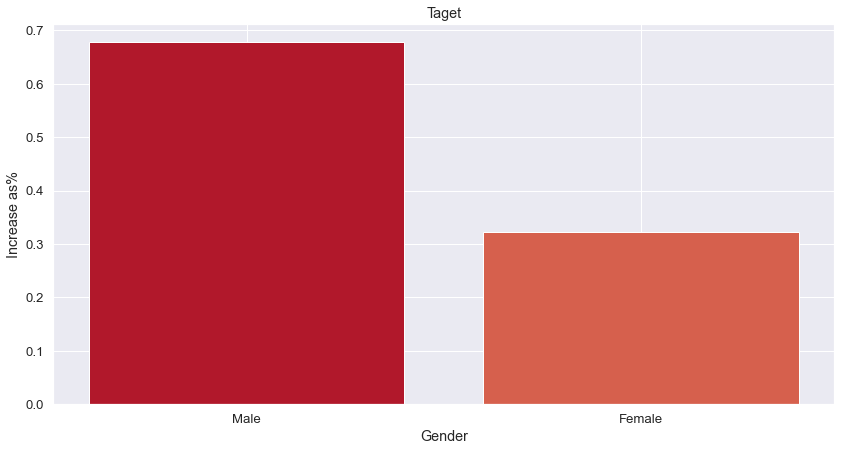

In [55]:
plt.figure(figsize=(14, 7))
print(round(MoviePredFinalized.Gender.value_counts(normalize=True),4) * 100)
plt.bar(['Male','Female'],MoviePredFinalized.Gender.value_counts(normalize=True),
        color=sns.color_palette("RdBu",n_colors=9))
plt.title('Taget')
plt.xlabel('Gender')
plt.ylabel('Increase as%')

# Split the data into Train and Test in 70:30 ratio

In [56]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X=MoviePredFinalized.drop('Gender',axis=1)
y=MoviePredFinalized['Gender']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)
print("Train Dataset - Independent : ",X_train.shape)
print("Train Dataset - Dependent : ",y_train.shape)
print("Test Dataset - Independent : ",X_test.shape)
print("Test Dataset - Dependent : ",y_test.shape)

Train Dataset - Independent :  (1836, 81)
Train Dataset - Dependent :  (1836,)
Test Dataset - Independent :  (787, 81)
Test Dataset - Dependent :  (787,)


# Model Creation

# Navie Bayes multinomial model

In [57]:
# Importing necessary libraries and packages to prepare the environment
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score,precision_recall_curve
from sklearn import metrics

Classification Report of Test 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       232
           1       0.71      1.00      0.83       555

    accuracy                           0.71       787
   macro avg       0.35      0.50      0.41       787
weighted avg       0.50      0.71      0.58       787

Accuracy of Test: 70.0 %
F1 Score of Test: 80.0 %
Precision Score of Train: 70.0 %
Recall/Sensitivity of Test: 100.0 %
Area under the ROC of Multinomial NaiveBayes - Test is: 65.59 %


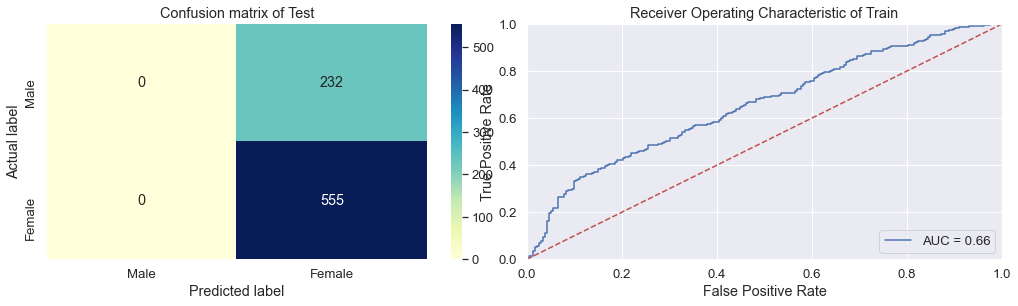

In [58]:
Gender_model=MultinomialNB() # initating the model
Gender_model.fit(X_train,y_train) # fit the model on train data
Gender_Pred_Test=Gender_model.predict(X_test) # Predicting the model on test data

#Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,Gender_Pred_Test))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,Gender_Pred_Test),1)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,Gender_Pred_Test),1)*100,"%")
print("Precision Score of Train:",round(precision_score(y_test,Gender_Pred_Test),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,Gender_Pred_Test),1)*100,"%")

# Confusion Matrix
cnf_matrixNB_Test1=confusion_matrix(y_test,Gender_Pred_Test)
labels = ['Male', 'Female']
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixNB_Test1), xticklabels=labels, yticklabels=labels, annot=True, cmap="YlGnBu" ,fmt='g')
 
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
Gender_Pred_Tes=Gender_model.predict_proba(X_test)
fprTe,tprTe,thresholdsTe=roc_curve(y_test,Gender_Pred_Tes[:,1])
ROC_AUC_LRTe=(auc(fprTe,tprTe))
ROC_AUC_LRT1e=(auc(fprTe,tprTe))*100
print('Area under the ROC of Multinomial NaiveBayes - Test is: %.2f' % ROC_AUC_LRT1e,"%")

# ROC Curve of Test
plt.subplot(1,2,2)
#plt.figure(figsize=(5, 3))
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprTe, tprTe, label = 'AUC = %0.2f' % ROC_AUC_LRTe)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM (Support Vector Machine Classifier) model

Classification Report of Test 
               precision    recall  f1-score   support

           0       0.68      0.14      0.23       232
           1       0.73      0.97      0.83       555

    accuracy                           0.73       787
   macro avg       0.71      0.56      0.53       787
weighted avg       0.72      0.73      0.66       787

Accuracy of Test: 70.0 %
F1 Score of Test: 80.0 %
Precision Score of Test: 70.0 %
Recall/Sensitivity of Test: 100.0 %
Area under the ROC of SVM - Test is: 72.56 %
Gini of SVM - Test is: 45.12 %


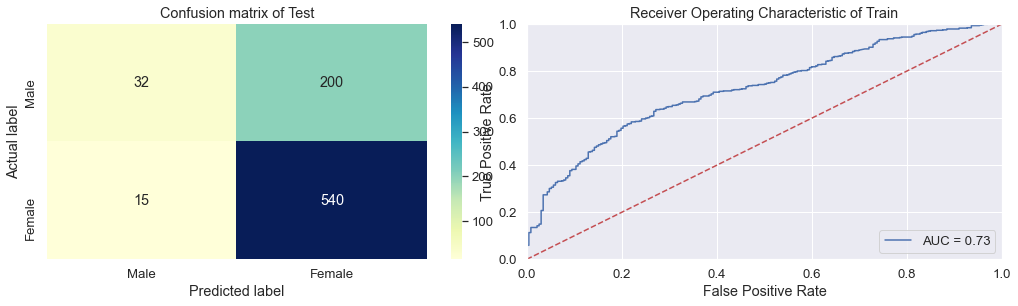

In [103]:
from sklearn import svm
#SVM_Model=svm.SVC(C=1000,kernel='rbf',probability=True)
SVM_Model=svm.SVC(probability=True)
SVM_Model.fit(X_train,y_train)
Gender_Pred_TestSVM=SVM_Model.predict(X_test)

#Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,Gender_Pred_TestSVM))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,Gender_Pred_TestSVM),1)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,Gender_Pred_TestSVM),1)*100,"%")
print("Precision Score of Test:",round(precision_score(y_test,Gender_Pred_TestSVM),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,Gender_Pred_TestSVM),1)*100,"%")

# Confusion Matrix
cnf_matrixSVM_Test1=confusion_matrix(y_test,Gender_Pred_TestSVM)
labels = ['Male', 'Female']
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixSVM_Test1), xticklabels=labels, yticklabels=labels, annot=True, cmap="YlGnBu" ,fmt='g')
 
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
#Gender_Pre_TestSVM = Gender_model.predict_proba(X_test)
Gender_Pre_TestSVM = SVM_Model.predict_proba(X_test)
fprTe,tprTe,thresholdsTe = roc_curve(y_test,Gender_Pre_TestSVM[:,1])
ROC_AUC_LRTe=(auc(fprTe,tprTe))
ROC_AUC_LRT1e=(auc(fprTe,tprTe))*100
Gini_LRTe= (2 * ROC_AUC_LRTe - 1) *100
print('Area under the ROC of SVM - Test is: %.2f' % ROC_AUC_LRT1e,"%")
print('Gini of SVM - Test is: %.2f' % Gini_LRTe,"%")

# ROC Curve of Test
plt.subplot(1,2,2)
#plt.figure(figsize=(5, 3))
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprTe, tprTe, label = 'AUC = %0.2f' % ROC_AUC_LRTe)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hypertunning the SVM model

In [104]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], # Penalty parameter
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # differentiates the class
              'gamma': ['scale', 'auto']}
SVMT=svm.SVC(max_iter=-1,probability=True)
SVM_TU = RandomizedSearchCV(estimator = SVMT, param_distributions = param_grid, n_iter = 10, scoring='accuracy',
                            n_jobs = -1, cv = 5, verbose = 2,random_state = 32)
SVM_TU.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.6s finished


RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=32, scoring='accuracy', verbose=2)

In [105]:
SVM_TU.best_estimator_

SVC(C=10, kernel='linear', probability=True)

In [106]:
SVM_TU.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 10}

[LibSVM]Classification Report of Test 
               precision    recall  f1-score   support

           0       0.58      0.28      0.38       232
           1       0.75      0.91      0.83       555

    accuracy                           0.73       787
   macro avg       0.66      0.60      0.60       787
weighted avg       0.70      0.73      0.69       787

Accuracy of Test: 70.0 %
F1 Score of Test: 80.0 %
Precision Score of Train: 80.0 %
Recall/Sensitivity of Test: 90.0 %
Area under the ROC of NaiveBayes - Test is: 72.56 %
Gini of NaiveBayes - Test is: 45.12 %


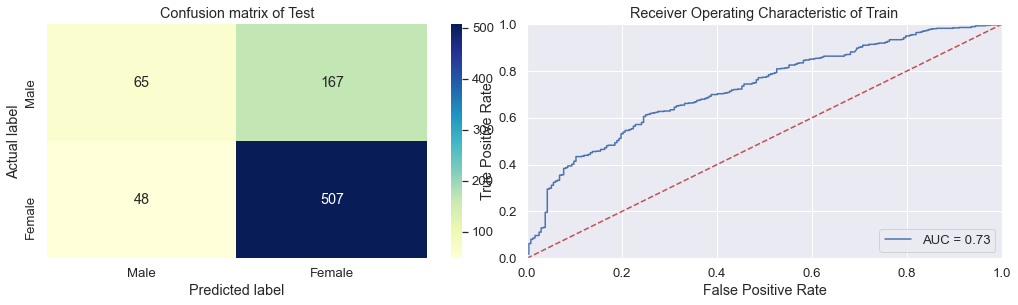

In [107]:
SVM_Tune=svm.SVC(C = 10, kernel = 'linear', gamma = 'scale', probability = True, verbose = 5, max_iter = -1, random_state = 32)
SVM_Tune.fit(X_train,y_train)
Gender_Pred_TestSVM_Tuned = SVM_Tune.predict(X_test)

#Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,Gender_Pred_TestSVM_Tuned))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,Gender_Pred_TestSVM_Tuned),1)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,Gender_Pred_TestSVM_Tuned),1)*100,"%")
print("Precision Score of Train:",round(precision_score(y_test,Gender_Pred_TestSVM_Tuned),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,Gender_Pred_TestSVM_Tuned),1)*100,"%")

# Confusion Matrix
cnf_matrixSVM_Test1=confusion_matrix(y_test,Gender_Pred_TestSVM_Tuned)
labels = ['Male', 'Female']
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixSVM_Test1), xticklabels=labels, yticklabels=labels, annot=True, cmap="YlGnBu" ,fmt='g')
 
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
Gender_Pre_TestSVM_TU = SVM_Tune.predict_proba(X_test)
fprTeT,tprTeT,thresholdsTeT = roc_curve(y_test,Gender_Pre_TestSVM_TU[:,1])
ROC_AUC_LRTeTU=(auc(fprTe,tprTe))
ROC_AUC_LRT1eTU=(auc(fprTe,tprTe))*100
Gini_LRTeTU= (2 * ROC_AUC_LRTeTU - 1) *100
print('Area under the ROC of NaiveBayes - Test is: %.2f' % ROC_AUC_LRT1eTU,"%")
print('Gini of NaiveBayes - Test is: %.2f' % Gini_LRTeTU,"%")

# ROC Curve of Test
plt.subplot(1,2,2)
#plt.figure(figsize=(5, 3))
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprTeT, tprTeT, label = 'AUC = %0.2f' % ROC_AUC_LRTeTU)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Optimum Threshold

In [108]:
precision, recall, thresholds = precision_recall_curve(y_test,Gender_Pre_TestSVM_TU[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)

scrsRF = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrsRF.loc[scrsRF['f1_score'] == scrsRF.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrsRF.f1_score.max())


Threshold cutoff:  0.3490101752199417
Max F1-score at cut-off :  0.8388589051657671


In [109]:
preds_T_SVM = np.where(SVM_Tune.predict_proba(X_test)[:,1] > 0.349010175, 1, 0)

round(pd.DataFrame({'Parameters':["Test"],
                    'Thresholds':["0.349010175"],
        'Accuracy':[(accuracy_score(y_test,preds_T_SVM)*100)],
        'Recall':[(recall_score(y_test,preds_T_SVM)*100)],
        'Precision':[(precision_score(y_test,preds_T_SVM)*100)],
        'F1 score':[(f1_score(y_test,preds_T_SVM)*100)],
        'ROC_AUC':[(roc_auc_score(y_test,preds_T_SVM)*100)]}),3)


,Parameters,Thresholds,Accuracy,Recall,Precision,F1 score,ROC_AUC
0,Test,0.349010175,73.443,98.018,73.315,83.886,56.337


Classification Report of Test 
               precision    recall  f1-score   support

           0       0.76      0.15      0.25       232
           1       0.73      0.98      0.84       555

    accuracy                           0.73       787
   macro avg       0.74      0.56      0.54       787
weighted avg       0.74      0.73      0.66       787

Accuracy of Test: 70.0 %
F1 Score of Test: 80.0 %
Precision Score of Train: 70.0 %
Recall/Sensitivity of Test: 100.0 %


Text(0.5, 10.5, 'Predicted label')

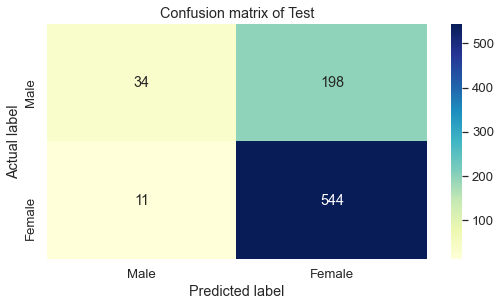

In [110]:
#Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,preds_T_SVM))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,preds_T_SVM),1)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,preds_T_SVM),1)*100,"%")
print("Precision Score of Train:",round(precision_score(y_test,preds_T_SVM),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,preds_T_SVM),1)*100,"%")

# Confusion Matrix
cnf_matrixSVM_Test1=confusion_matrix(y_test,preds_T_SVM)
labels = ['Male', 'Female']
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixSVM_Test1), xticklabels=labels, yticklabels=labels, annot=True, cmap="YlGnBu" ,fmt='g')
 
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Cross Fold validation of the model

In [114]:
# Cross fold validation helps to understand how well the model will perform in the production environment
from sklearn.model_selection import cross_val_score
VL_accuracy_SVM = cross_val_score(SVM_Tune, X, y, scoring='accuracy', cv=5, n_jobs = -1,verbose = 0)
VL_F1score_SVM = cross_val_score(SVM_Tune, X, y, scoring='f1', cv=5, n_jobs = -1,verbose = 0)

print("SVM Model Mean Accuracy",round((np.mean(VL_accuracy_SVM)*100),2))
print("SVM Model STD Accuracy",round((np.std(VL_accuracy_SVM)*100),2))

print("SVM Model Mean F1 score",round((np.mean(VL_F1score_SVM)*100),2))
print("SVM Model STD F1 score",round((np.std(VL_F1score_SVM)*100),2))

SVM Model Mean Accuracy 72.66
SVM Model STD Accuracy 0.43
SVM Model Mean F1 score 82.21
SVM Model STD F1 score 0.48
